In [5]:
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [12]:
url = "/home/jos/tf_lab/Ultralight-SimplePose/generator_dataset/dataset_file3.csv"
data_title = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','res']

dataset = read_csv(url, names=data_title)
# Split-out validation dataset
array = dataset.values

X = array[:,[5,6,11,12,13,14,15,16]]
y = array[:,len(data_title)-1]
data_title = ['5','6','11','12','13','14','15','16','res']
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

In [13]:
# Spot check algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))


LR : 1.000000 (0.000000)
LDA : 1.000000 (0.000000)
KNN : 0.988889 (0.033333)
NB : 1.000000 (0.000000)
SVM : 0.656944 (0.095025)


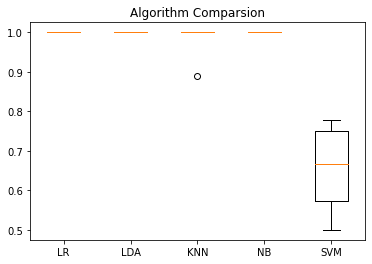

In [14]:
# evaluate each model in Turn
results = []
names = []
for name,model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s : %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Comparison
pyplot.boxplot(results, labels = names)
pyplot.title('Algorithm Comparison')
pyplot.show()